## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [13]:
import pandas as pd
import warnings

from sklearn.model_selection import train_test_split

warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
whr_df = pd.read_csv('data/WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [14]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=4,
                                       labels=['Very Low', 'Low', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # the proportion of each class will be approximately the same in both y_train and y_test as it is in the original y

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
# y_test_labels = ## Complete in a similar manner as above
y_test_labels = y_test.astype('category').cat.codes

<h3> Add new data

In [15]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("data/newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [16]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

original_train_index = X_train.index
original_test_index = X_test.index

X_train = pd.merge(X_train, countrydata, left_on='country', right_on='country_name', how='left')
X_test = pd.merge(X_test, countrydata, left_on='country', right_on='country_name', how='left')

X_train.index = original_train_index
X_test.index = original_test_index

if 'index' in X_train.columns:
    X_train.drop(columns=['index'], inplace=True)
if 'index' in X_test.columns:
    X_test.drop(columns=['index'], inplace=True)

## 1.  EDA

In [17]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Find out the number and percentage of missing values in the table per column

In [18]:
# Your code here:
missing_values_count = X_train.isna().sum()
total_rows = X_train.shape[0]
missing_values_percentage = (missing_values_count / total_rows) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage
})
missing_data

,Missing Values,Percentage (%)
country,0,0.000000
region,0,0.000000
gdp_per_capita,0,0.000000
social_support,0,0.000000
healthy_life_expectancy,0,0.000000
freedom_to_make_life_choices,0,0.000000
generosity,0,0.000000
perceptions_of_corruption,0,0.000000
country_name,6,6.315789
population,6,6.315789


Plot the frequency distribution / histogram of some of the numerical features that you think are important

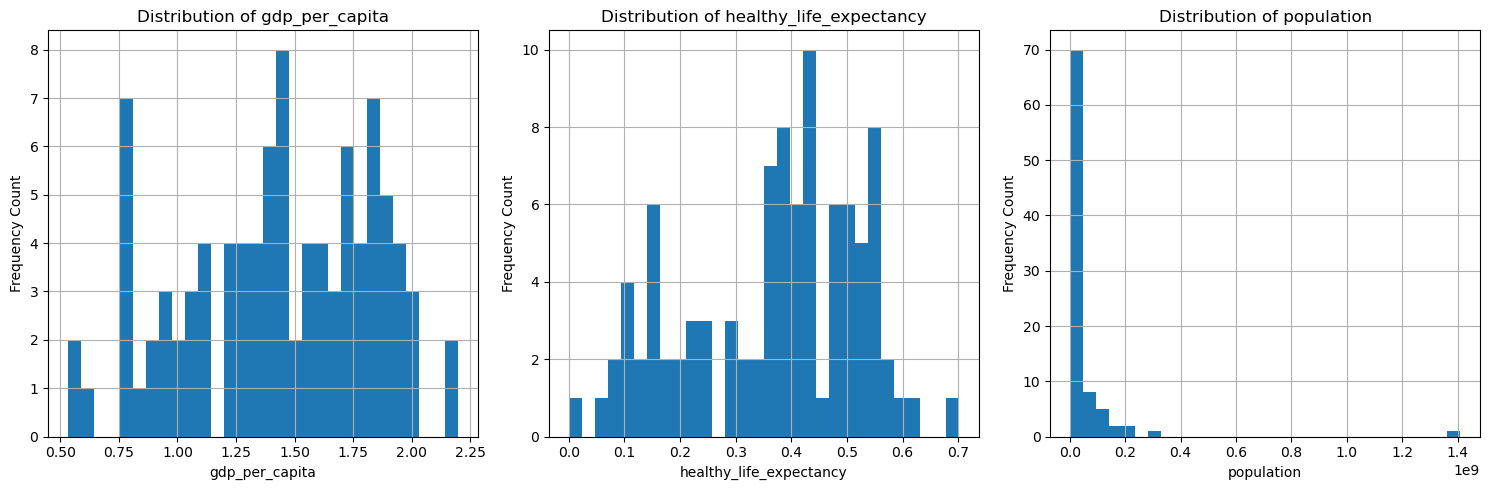

In [19]:
# Your plotting code here:
import matplotlib.pyplot as plt
columns_to_plot = ['gdp_per_capita', 'healthy_life_expectancy', 'population']

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    X_train[column].dropna().hist(bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency Count')

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

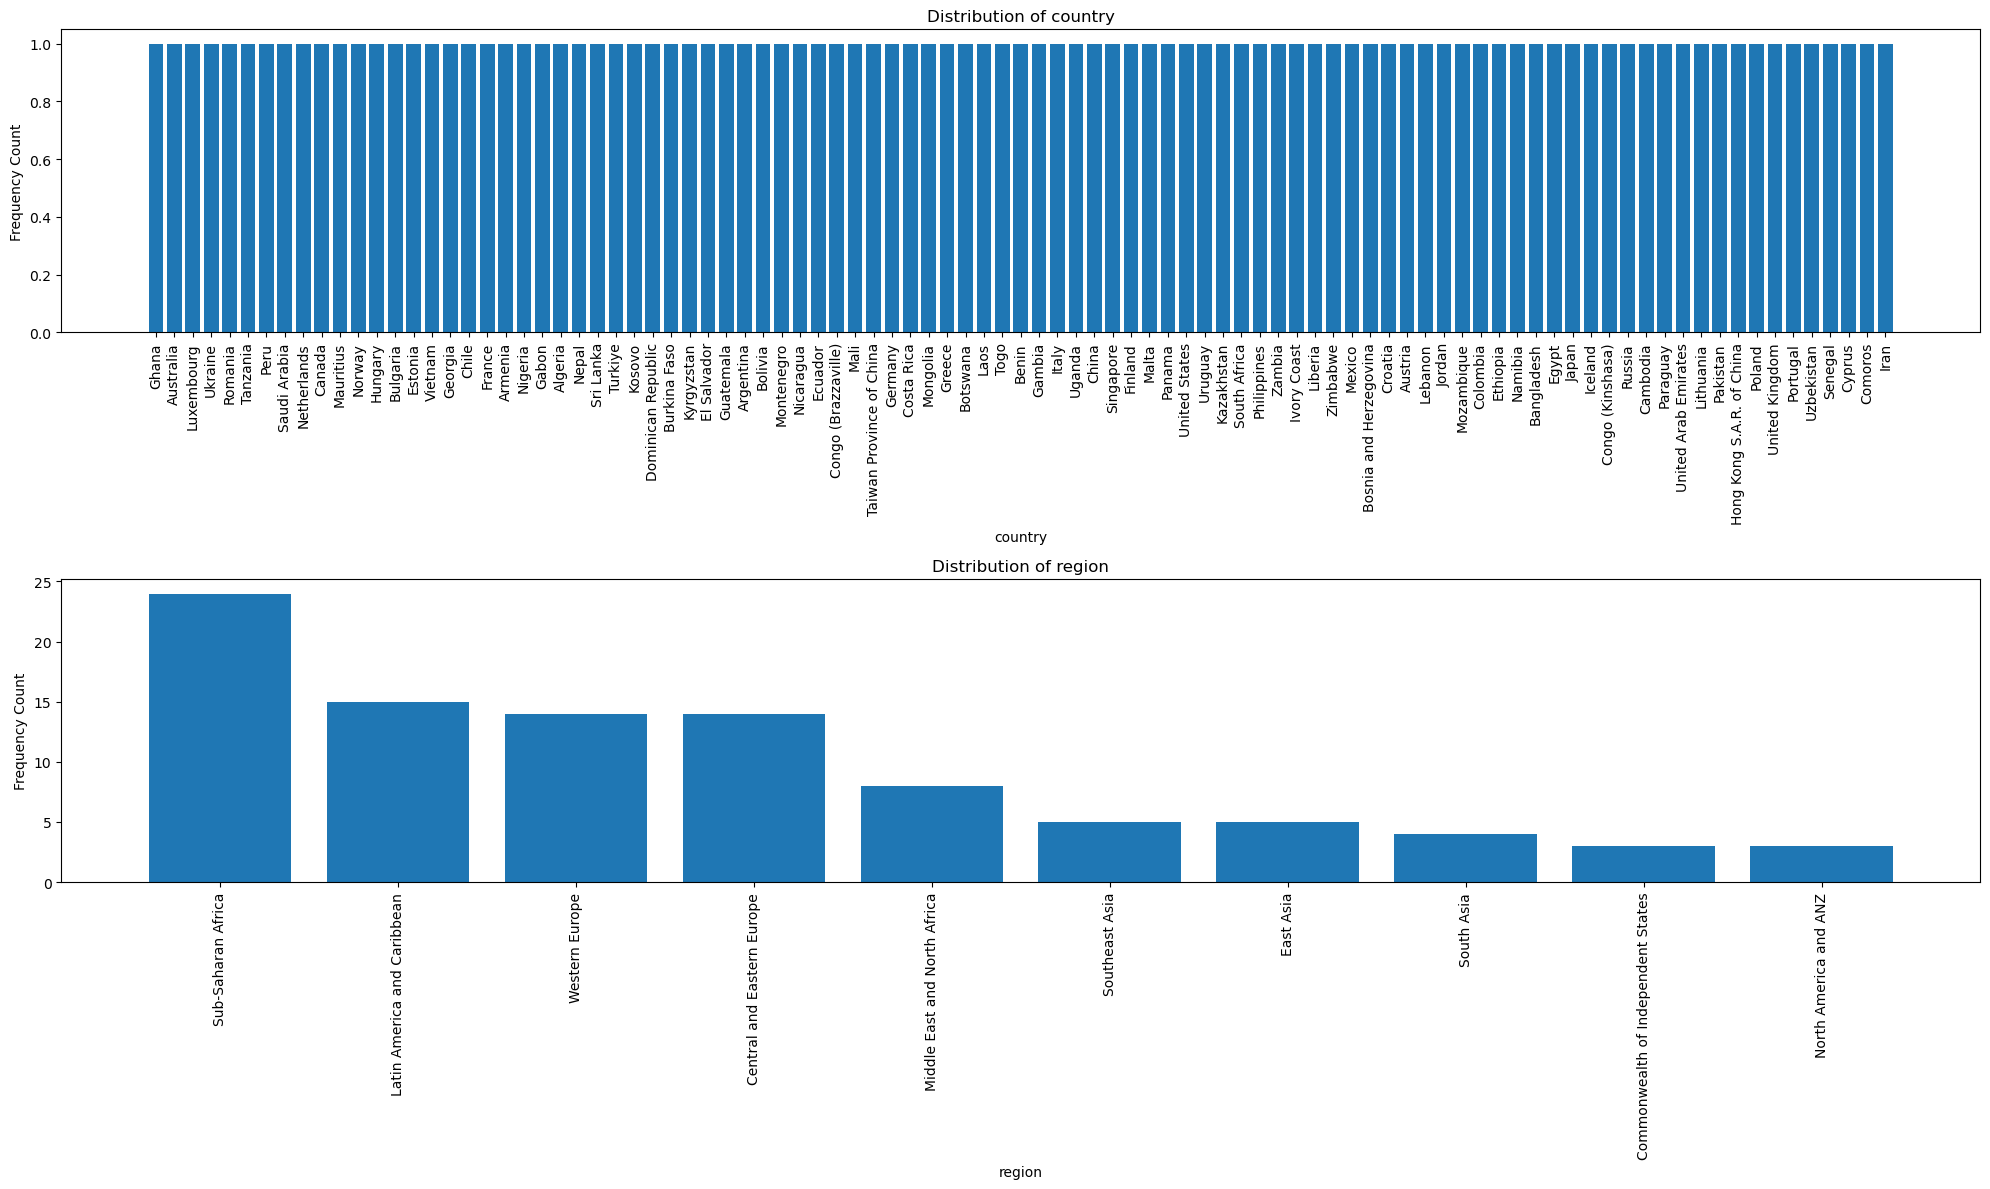

In [20]:
# Your plotting code here:
categorical_columns = ['country', 'region']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

for i, column in enumerate(categorical_columns):
    value_counts = X_train[column].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency Count')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

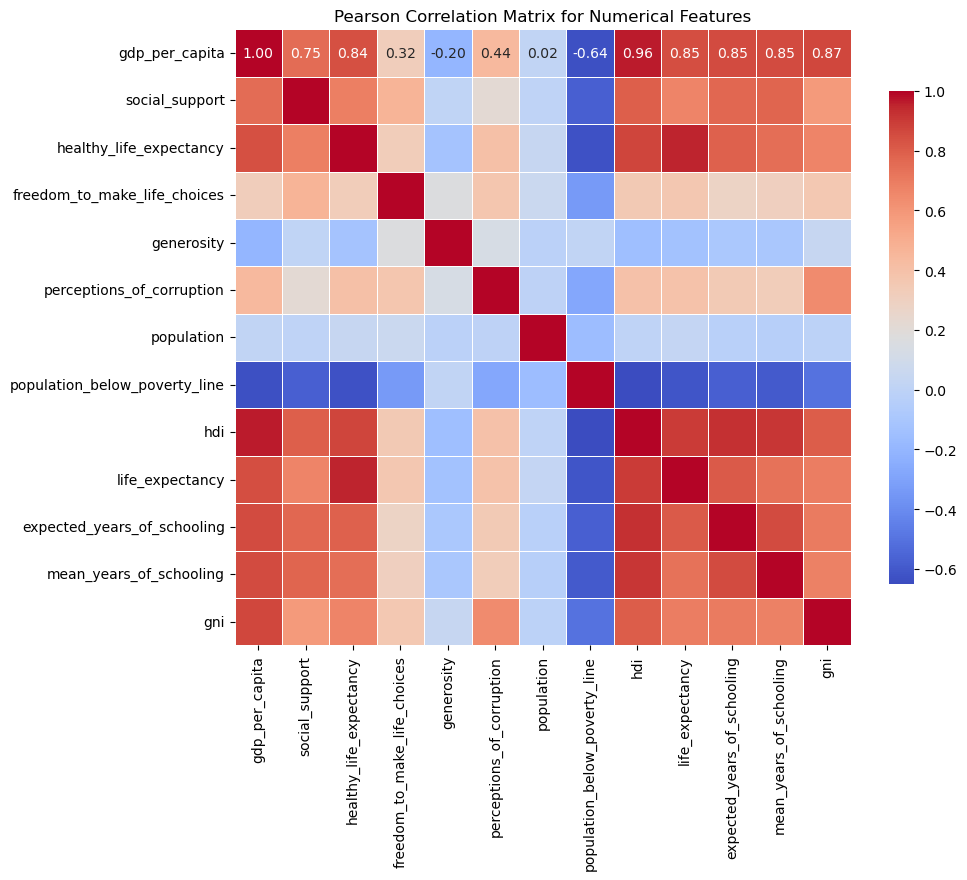

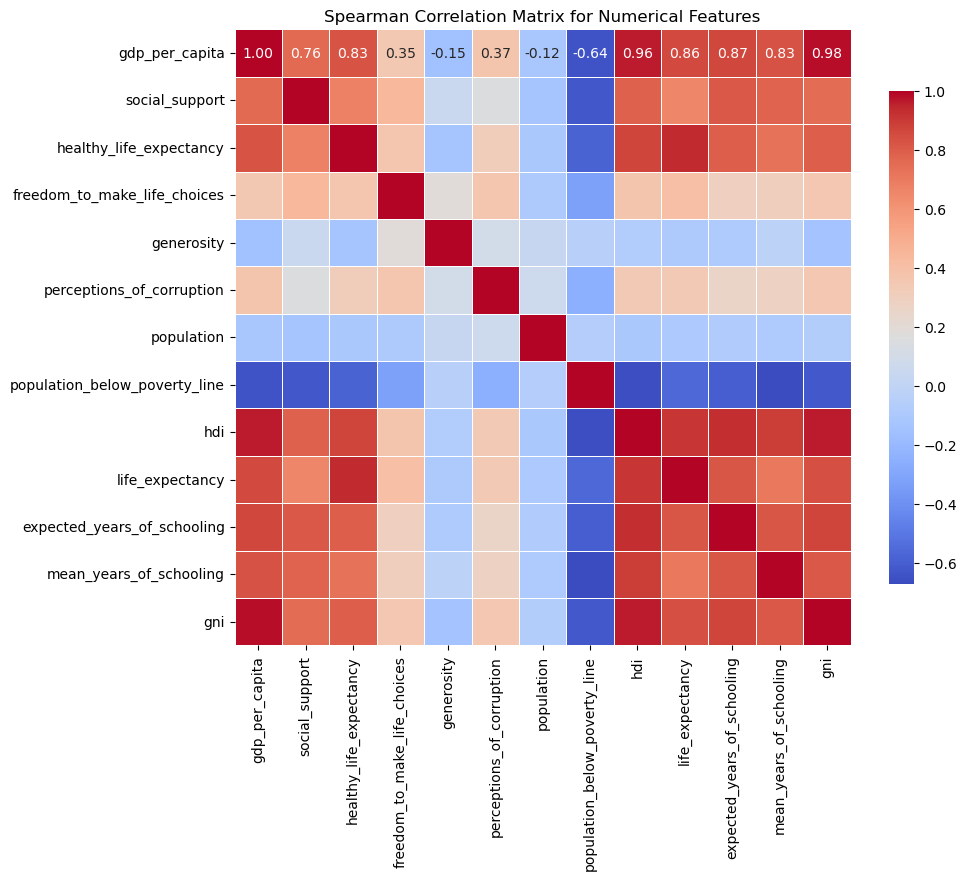

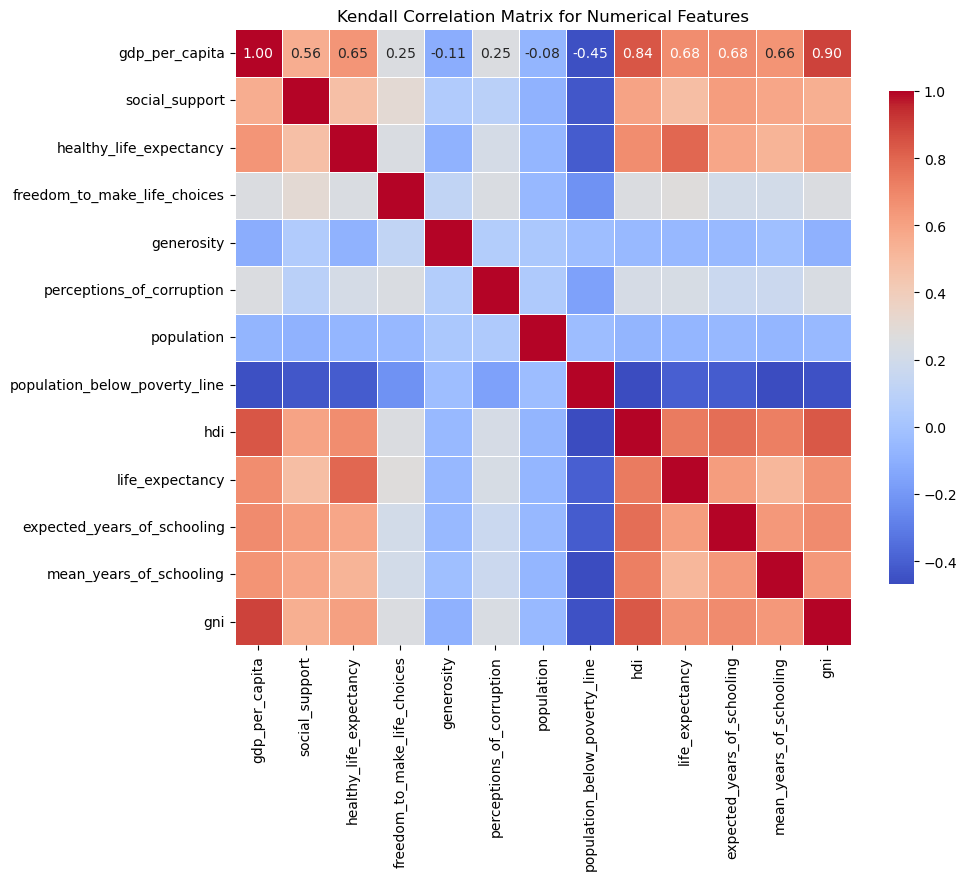

In [21]:
# Your code here:
import seaborn as sns
import numpy as np
numerical_df = X_train.select_dtypes(include=[np.number])

pearson_corr = numerical_df.corr(method='pearson')
spearman_corr = numerical_df.corr(method='spearman')
kendall_corr = numerical_df.corr(method='kendall')

def plot_correlation_matrix(corr, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
                linewidths=.5, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

plot_correlation_matrix(pearson_corr, 'Pearson Correlation Matrix for Numerical Features')
plot_correlation_matrix(spearman_corr, 'Spearman Correlation Matrix for Numerical Features')
plot_correlation_matrix(kendall_corr, 'Kendall Correlation Matrix for Numerical Features')

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

'Correlation of features with target variable:'

happiness_category               1.000000
hdi                              0.795789
gdp_per_capita                   0.772586
gni                              0.765774
social_support                   0.755731
expected_years_of_schooling      0.750100
life_expectancy                  0.725492
mean_years_of_schooling          0.699922
healthy_life_expectancy          0.680994
freedom_to_make_life_choices     0.563816
perceptions_of_corruption        0.437422
generosity                       0.047230
population                       0.024052
population_below_poverty_line   -0.424140
Name: happiness_category, dtype: float64

'Box Plots for each variable:'

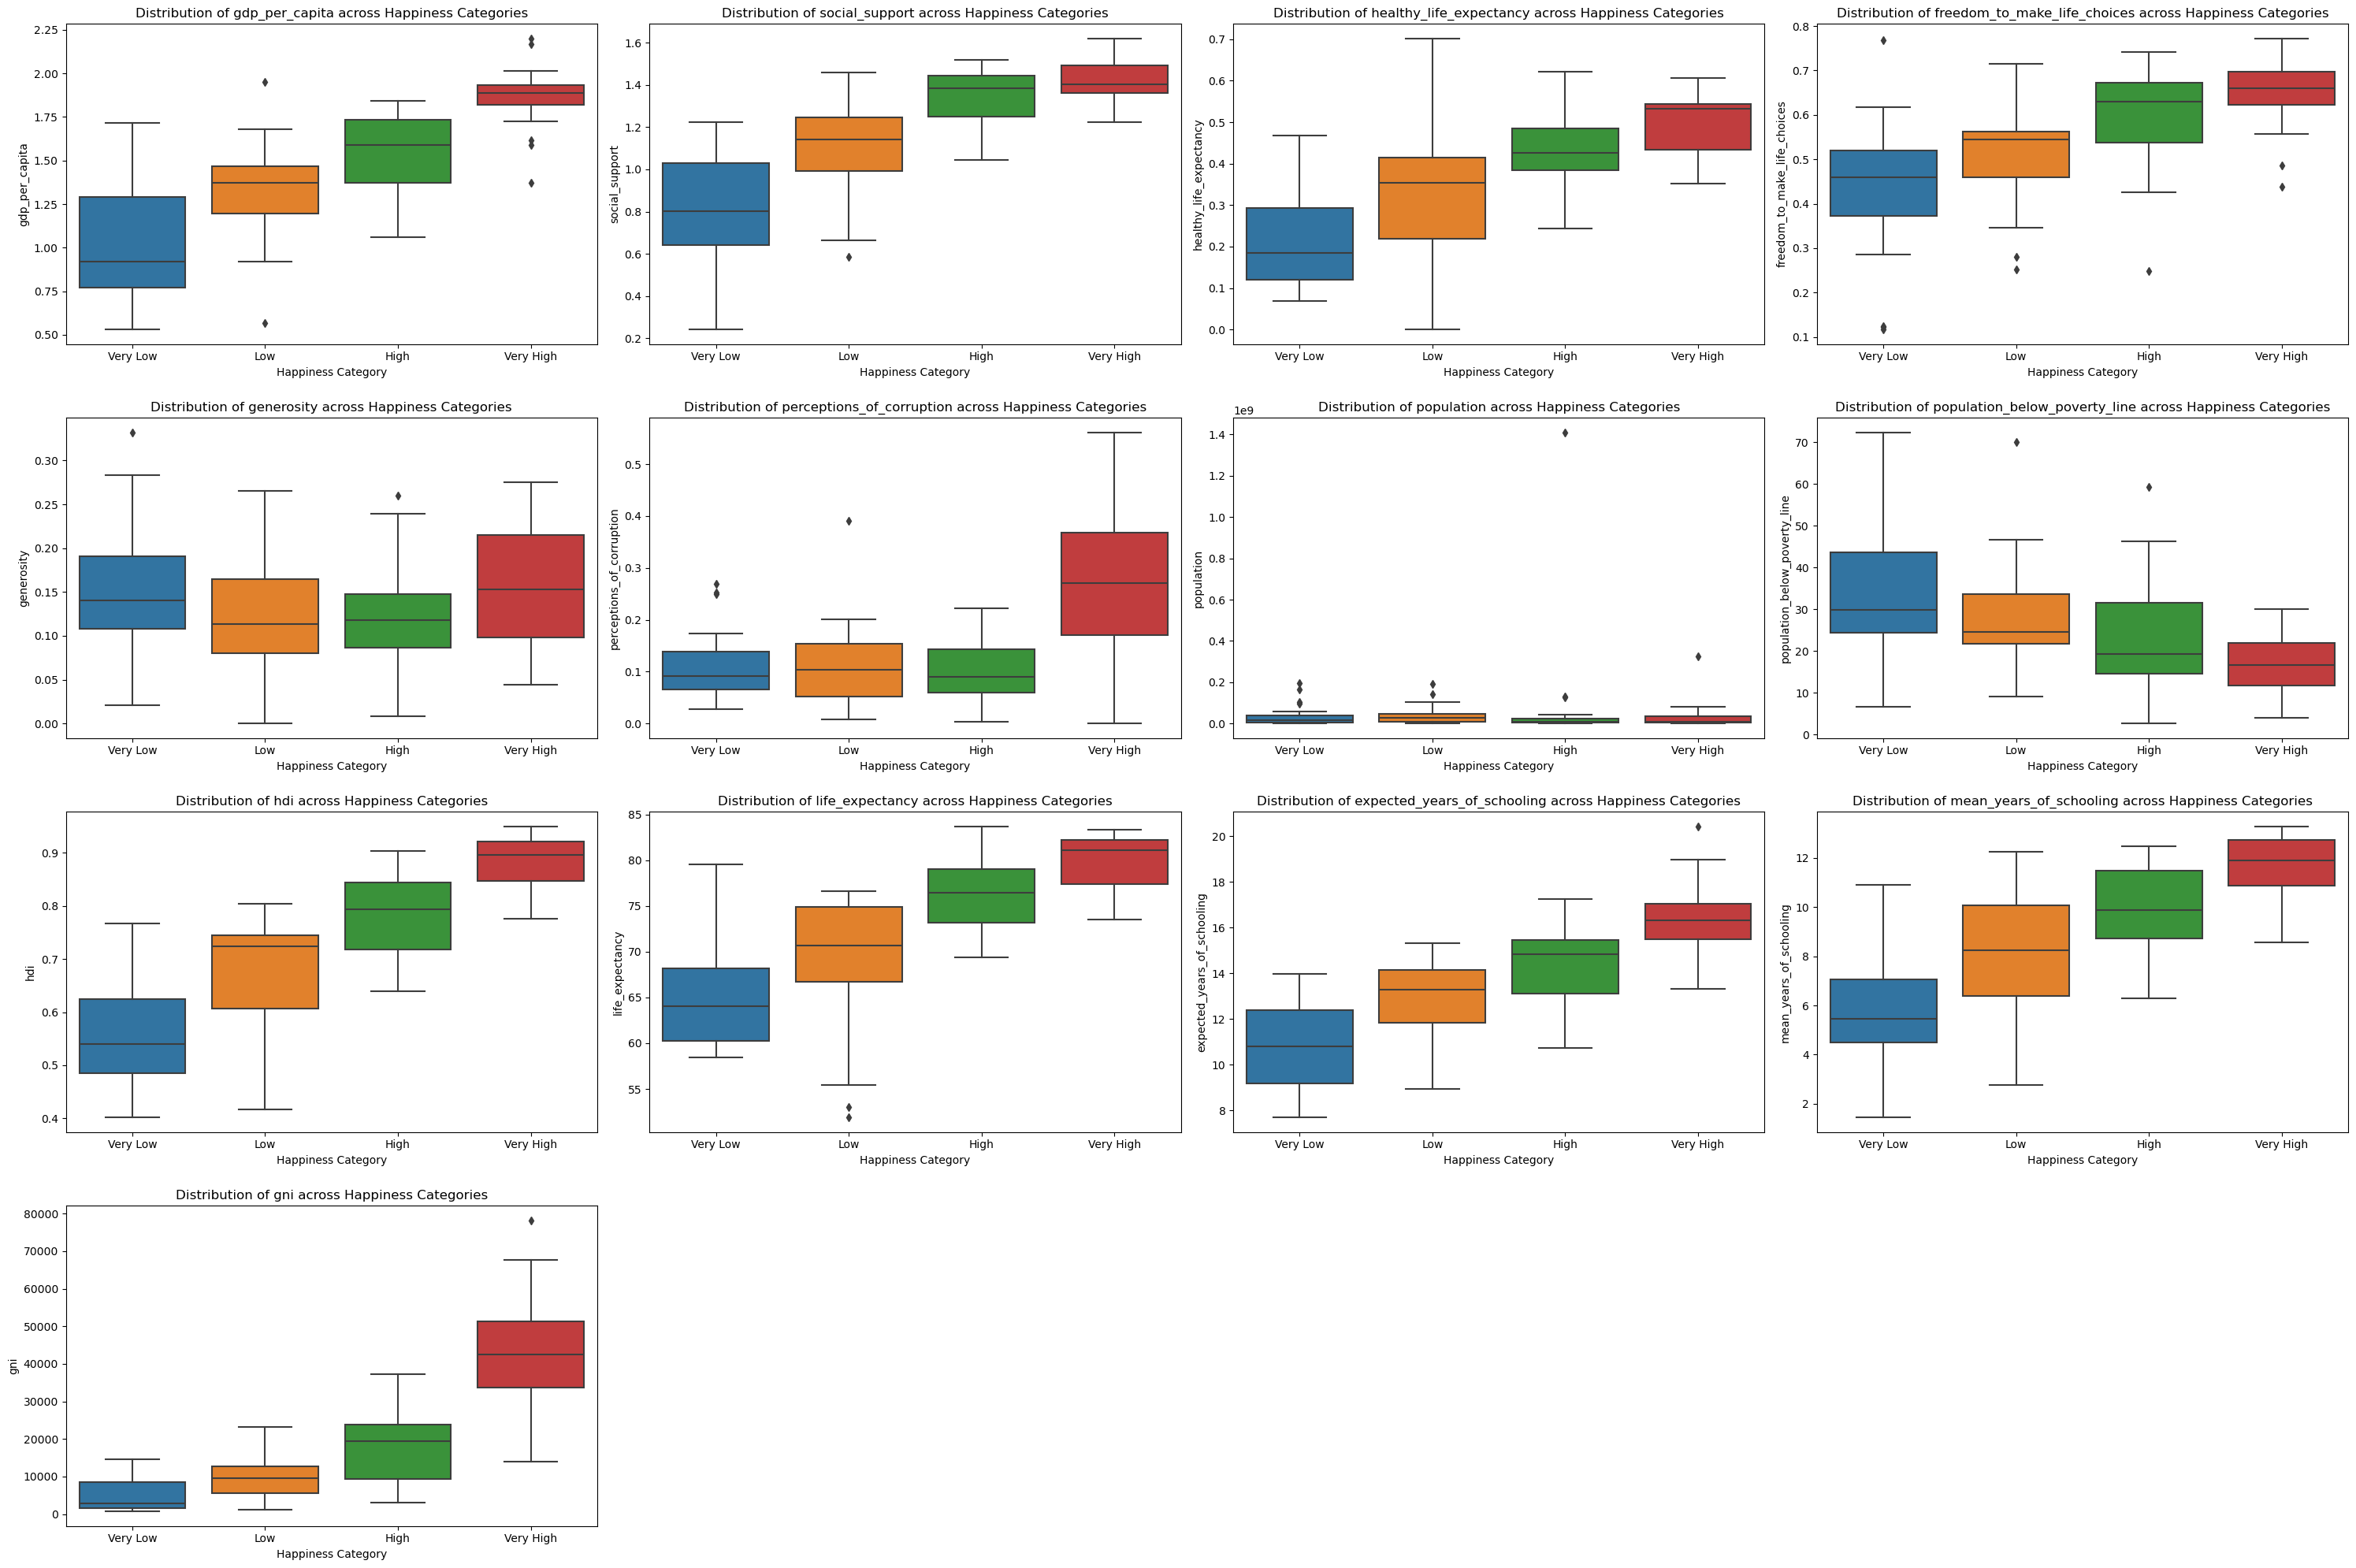

In [22]:
# Your plotting code(s) here:
numerical_df['happiness_category'] = y_train_labels
target_correlation = numerical_df.corr()['happiness_category'].sort_values(ascending=False)
display("Correlation of features with target variable:", target_correlation)
display("Box Plots for each variable:")

num_columns = len(numerical_df.columns[:-1])
rows = (num_columns + 3) // 4
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(30, 5 * rows))
axes = axes.flatten()

for i, column in enumerate(numerical_df.columns[:-1]):
    sns.boxplot(ax=axes[i], x=y, y=numerical_df[column])
    axes[i].set_title(f'Distribution of {column} across Happiness Categories')
    axes[i].set_xlabel('Happiness Category')
    axes[i].set_ylabel(column)

# Hide any unused axes if the number of plots is not a perfect multiple of 4
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

In [23]:
# Your code here:

from scipy.stats import zscore
# Z score
z_scores = numerical_df.apply(zscore)
threshold = 3
is_outlier_by_z = (z_scores.abs() > threshold)

# Calculate Q1, Q3, and IQR
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
is_outlier_by_iqr = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR)))
outliers_combined = is_outlier_by_z | is_outlier_by_iqr

def highlight_outliers(data, outlier_mask):
    attr = 'background-color: salmon'
    return pd.DataFrame(np.where(outlier_mask, attr, ''),
                        index=data.index, columns=data.columns)

styled_df = numerical_df.style.apply(highlight_outliers, outlier_mask=outliers_combined, axis=None)
display(styled_df)

,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,happiness_category
106,1.101000,0.756000,0.197000,0.526000,0.211000,0.035000,28833629.000000,24.200000,0.578829,61.531000,11.502620,6.940000,3838.670257,0
118,0.761000,0.614000,0.174000,0.286000,0.332000,0.033000,2100568.000000,48.400000,0.451575,60.463000,8.940000,3.292000,1540.829529,0
135,1.417000,0.476000,0.398000,0.123000,0.061000,0.027000,6082357.000000,28.600000,0.762841,79.537000,13.287860,8.605452,13311.576190,0
10,1.927000,1.382000,0.535000,0.630000,0.191000,0.310000,8735453.000000,4.000000,0.893405,81.583000,15.912230,11.333976,43608.823870,3
47,1.727000,1.455000,0.475000,0.500000,0.087000,0.003000,4189353.000000,19.500000,0.827403,77.495000,15.259550,11.222197,20291.343650,2
70,1.467000,1.361000,0.429000,0.485000,0.247000,0.008000,3507017.000000,17.200000,0.749834,76.634000,14.175680,9.013500,10090.774420,1
35,1.550000,1.169000,0.389000,0.632000,0.086000,0.115000,129163276.000000,46.200000,0.761683,76.972000,13.299090,8.554985,16383.106680,2
133,0.758000,0.881000,0.069000,0.363000,0.112000,0.117000,16529904.000000,72.300000,0.515640,59.200000,10.314330,7.734280,1587.723183,0
124,0.628000,0.644000,0.141000,0.471000,0.219000,0.071000,4731906.000000,54.100000,0.426899,61.188000,9.903696,4.442000,682.590428,0
92,1.094000,0.584000,0.120000,0.467000,0.138000,0.131000,24294750.000000,46.300000,0.473679,51.889000,8.947399,5.000000,3162.738853,1


## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

In [24]:
# Your code here:
skewness = X_train.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)
print("Skewness of numerical columns:")
display(skewness)

high_skew_threshold = 2
high_skew_cols = skewness[skewness > high_skew_threshold].index
print(f'High skewness columns: {high_skew_cols}')

for col in high_skew_cols:
    if (X_train[col] < 0).any():
        print(f'Warning, negative values in {col}')
    elif (X_train[col] == 0).any():
        X_train[col] = np.log(X_train[col]+1)
        X_test[col] = np.log(X_test[col]+1)
    else:
        X_train[col] = np.log(X_train[col])
        X_test[col] = np.log(X_test[col]+1)

# Check the skewness after transformation
new_skewness = X_train[high_skew_cols].skew()
print("New skewness after log transformation (train):")
print(new_skewness)

Skewness of numerical columns:


population                       7.921309
perceptions_of_corruption        1.390071
gni                              1.387909
population_below_poverty_line    1.029168
generosity                       0.357448
expected_years_of_schooling     -0.172448
gdp_per_capita                  -0.352079
healthy_life_expectancy         -0.413842
mean_years_of_schooling         -0.513943
hdi                             -0.520164
life_expectancy                 -0.661206
freedom_to_make_life_choices    -0.877937
social_support                  -0.970625
dtype: float64

High skewness columns: Index(['population'], dtype='object')
New skewness after log transformation (train):
population    0.027284
dtype: float64


Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [25]:
# Your code here:
X_train['life_expectancy * gdp_per_capita'] = X_train['healthy_life_expectancy'] * X_train['gdp_per_capita']
X_test['life_expectancy * gdp_per_capita'] = X_test['healthy_life_expectancy'] * X_test['gdp_per_capita']
X_train

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,life_expectancy * gdp_per_capita
106,Ghana,Sub-Saharan Africa,1.101,0.756,0.197,0.526,0.211,0.035,Ghana,17.177053,24.2,0.578829,61.531,11.50262,6.940000,3838.670257,0.216897
118,Gambia,Sub-Saharan Africa,0.761,0.614,0.174,0.286,0.332,0.033,Gambia,14.557718,48.4,0.451575,60.463,8.94000,3.292000,1540.829529,0.132414
135,Lebanon,Middle East and North Africa,1.417,0.476,0.398,0.123,0.061,0.027,Lebanon,15.620903,28.6,0.762841,79.537,13.28786,8.605452,13311.576190,0.563966
10,Austria,Western Europe,1.927,1.382,0.535,0.630,0.191,0.310,Austria,15.982900,4.0,0.893405,81.583,15.91223,11.333976,43608.823870,1.030945
47,Croatia,Central and Eastern Europe,1.727,1.455,0.475,0.500,0.087,0.003,Croatia,15.248057,19.5,0.827403,77.495,15.25955,11.222197,20291.343650,0.820325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Kyrgyzstan,Commonwealth of Independent States,1.061,1.439,0.417,0.735,0.234,0.018,Kyrgyzstan,15.614761,32.1,0.663631,70.791,13.00323,10.802262,3096.796097,0.442437
103,Burkina Faso,Sub-Saharan Africa,0.768,0.814,0.107,0.419,0.188,0.113,Burkina Faso,16.770076,40.1,0.401740,59.007,7.69281,1.441532,1537.499309,0.082176
72,Dominican Republic,Latin America and Caribbean,1.536,1.227,0.351,0.623,0.083,0.195,Dominican Republic,16.191996,30.5,0.721686,73.650,13.16925,7.678900,12756.401230,0.539136
33,Kosovo,Central and Eastern Europe,1.374,1.269,0.372,0.639,0.275,0.045,Kosovo,14.454861,30.0,0.786000,NaN,NaN,NaN,NaN,0.511128


## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=[np.number])
numeric_features = numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region'] # "sub-regrion" is not found here, assume is country!

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features, ignoring unknown categories
])



# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [29]:
# Write function to transform data with preprocessor

def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data
preprocessed_data = preprocessor(X_train)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [33]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

preprocessed_X_train = preprocessor(X_train)
y_train_encoded = to_categorical(y_train_labels, 4)

feature_count = preprocessed_X_train.shape[1]

keras_model = Sequential([
    Dense(128, input_shape=(feature_count,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # The last layer's number of neurons should equal the number of classes
    # Softmax activation function is used for multi-class classification
    Dense(4, activation='softmax')
]) ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)

#Use Softmax activation in last layer. How many neurons should there be in the last layer?



# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
history = keras_model.fit(preprocessor(X_train), y_train_encoded, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Epoch 1/300


/Users/hanzhaoyu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4955 - loss: 1.3885 - val_accuracy: 0.3750 - val_loss: 1.3942
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5005 - loss: 1.3699 - val_accuracy: 0.3750 - val_loss: 1.3908
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4819 - loss: 1.3482 - val_accuracy: 0.2917 - val_loss: 1.3867
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4436 - loss: 1.3517 - val_accuracy: 0.2917 - val_loss: 1.3842
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4599 - loss: 1.3230 - val_accuracy: 0.2500 - val_loss: 1.3825
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5045 - loss: 1.3167 - val_accuracy: 0.2500 - val_loss: 1.3800
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5331 - loss: 1.3058 - val_accuracy: 0.2917 - val_loss: 1.3778
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5314 - loss: 1.2920 - val_accuracy: 0.2917 - val_loss: 1.3756
Epoch 9/300

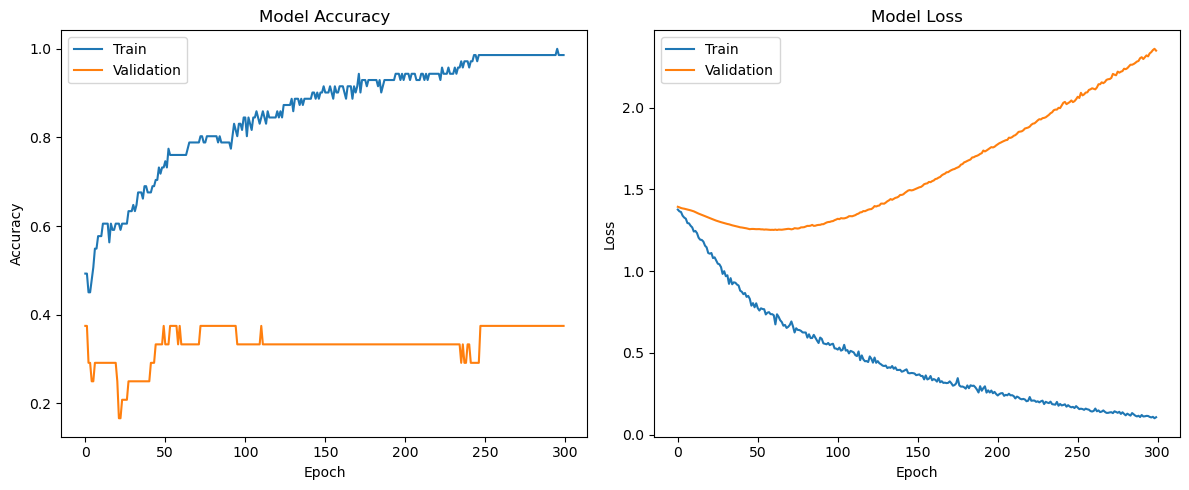

In [34]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [37]:
#-- Generate predicted y values
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Note: Keras predict returns the predicted column index location for classification models

preprocessed_X_test = preprocessor(X_test)
predicted_probabilities = keras_model.predict(preprocessed_X_test)
prediction_column_index = np.argmax(predicted_probabilities, axis=1)

# extract correct prediction labels
prediction_labels = y_test_labels


## Write code to show model performance by comparing prediction_labels with true labels
accuracy = accuracy_score(prediction_column_index, prediction_labels)
print('The test accuracy is', accuracy)

conf_matrix = confusion_matrix(prediction_column_index, prediction_labels)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(prediction_column_index, prediction_labels)
print("Classification Report:\n", class_report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
The test accuracy is 0.6904761904761905
Confusion Matrix:
 [[11  5  1  0]
 [ 0  5  3  0]
 [ 0  0  5  3]
 [ 0  0  1  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.50      0.62      0.56         8
           2       0.50      0.62      0.56         8
           3       0.73      0.89      0.80         9

    accuracy                           0.69        42
   macro avg       0.68      0.70      0.67        42
weighted avg       0.75      0.69      0.70        42



## 6. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


  0%|          | 0/42 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 350us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step
1/1 

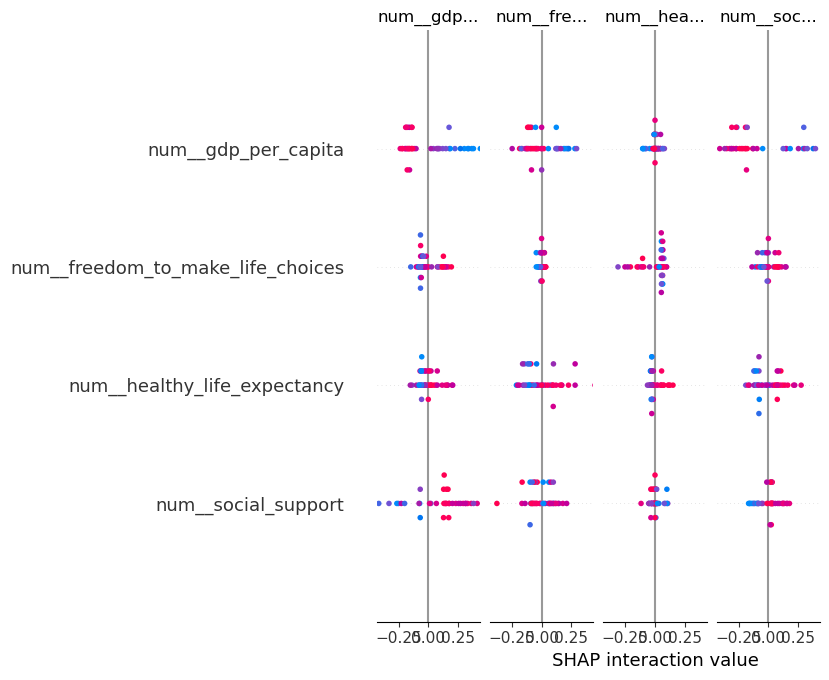

In [38]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
# Define an explainer that will help us interpret the model's decisions
# (Hint: Use shap.Explainer with the trained model and X_test data)
preprocessed_X_test = preprocessor(X_test)

explainer = shap.Explainer(keras_model, preprocessed_X_test)
explainer = shap.KernelExplainer(keras_model.predict, preprocessed_X_test)

# Compute SHAP values for X_test
# This step generates Shapley values, which explain how each feature contributes to predictions
shap_values = explainer.shap_values(preprocessed_X_test)

# Generate SHAP summary plot
# This plot will show which features have the most impact on predictions
#shap.summary_plot(## Pass the required parameters to create a summary plot)
shap.summary_plot(shap_values, preprocessed_X_test, feature_names=preprocess.get_feature_names_out())
# Your cell should output a SHAP summary plot showing the most important features.
